<a href="https://colab.research.google.com/github/panda1230/pytorch-cnn-visualizations/blob/master/VGG19_adversarialnoise_sensitivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''Initialize the network architecture'''

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.backends.cudnn as cudnn

import torchvision
import torchvision.transforms as transforms

import os
import time
import numpy as np
import matplotlib.pyplot as plt


size_1 = 64
size_2 = 64
size_4 = 128
size_5 = 128
size_7 = 256
size_8 = 256
size_9 = 256
size_10 = 256
size_12 = 512
size_13 = 512
size_14 = 512
size_15 = 512
size_17 = 512
size_18 = 512
size_19 = 512
size_20 = 512



class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 3 input channels for CIFAR10, VGG11 calls for 64 output channels from 
        # the first conv layer, a batchnorm, then a ReLU
        self.conv1 = nn.Conv2d(3, size_1, kernel_size = 3, padding = 1)
        self.norm1 = nn.BatchNorm2d(64)
        self.relu1 = nn.ReLU()
        
        #layer 2 is a conv that produces 64 channels, same format as layer 1
        self.conv2 = nn.Conv2d(size_1, size_2, kernel_size = 3, padding = 1)
        self.norm2 = nn.BatchNorm2d(size_1)
        self.relu2 = nn.ReLU()
        
        #layer 3 is a pooling layer
        self.pool3 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 4 is a conv that produces 128 channels, same format as layer 1
        self.conv4 = nn.Conv2d(size_2, size_4, kernel_size = 3, padding = 1)
        self.norm4 = nn.BatchNorm2d(size_4)
        self.relu4 = nn.ReLU()
        
        #layer 5 is a conv that produces 128 channels, same format as layer 1
        self.conv5 = nn.Conv2d(size_4, size_5, kernel_size = 3, padding = 1)
        self.norm5 = nn.BatchNorm2d(size_5)
        self.relu5 = nn.ReLU()
        
        #layer 6 is a pooling layer
        self.pool6 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 7 is a conv that produces 256 channels, same format as layer 1
        self.conv7 = nn.Conv2d(size_5, size_7, kernel_size = 3, padding = 1)
        self.norm7 = nn.BatchNorm2d(size_7)
        self.relu7 = nn.ReLU()
        
        #layer 8 is a conv that produces 256 channels, same format as layer 1
        self.conv8 = nn.Conv2d(size_7, size_8, kernel_size = 3, padding = 1)
        self.norm8 = nn.BatchNorm2d(size_8)
        self.relu8 = nn.ReLU()
        
        #layer 9 is a conv that produces 256 channels, same format as layer 1
        self.conv9 = nn.Conv2d(size_8, size_9, kernel_size = 3, padding = 1)
        self.norm9 = nn.BatchNorm2d(size_9)
        self.relu9 = nn.ReLU()
        
        #layer 10 is a conv that produces 256 channels, same format as layer 1
        self.conv10 = nn.Conv2d(size_9, size_10, kernel_size = 3, padding = 1)
        self.norm10 = nn.BatchNorm2d(size_10)
        self.relu10 = nn.ReLU()
        
        #layer 11 is a pooling layer
        self.pool11 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 12 is a conv that produces 512 channels, same format as layer 1
        self.conv12 = nn.Conv2d(size_10, size_12, kernel_size = 3, padding = 1)
        self.norm12 = nn.BatchNorm2d(size_12)
        self.relu12 = nn.ReLU()
        
        #layer 13 is a conv that produces 512 channels, same format as layer 1
        self.conv13 = nn.Conv2d(size_12, size_13, kernel_size = 3, padding = 1)
        self.norm13 = nn.BatchNorm2d(size_13)
        self.relu13 = nn.ReLU()
        
        #layer 14 is a conv that produces 512 channels, same format as layer 1
        self.conv14 = nn.Conv2d(size_13, size_14, kernel_size = 3, padding = 1)
        self.norm14 = nn.BatchNorm2d(size_14)
        self.relu14 = nn.ReLU()
        
        #layer 15 is a conv that produces 512 channels, same format as layer 1
        self.conv15 = nn.Conv2d(size_14, size_15, kernel_size = 3, padding = 1)
        self.norm15 = nn.BatchNorm2d(size_15)
        self.relu15 = nn.ReLU()
        
        #layer 16 is a pooling layer
        self.pool16 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 17 is a conv that produces 512 channels, same format as layer 1
        self.conv17 = nn.Conv2d(size_15, size_17, kernel_size = 3, padding = 1)
        self.norm17 = nn.BatchNorm2d(size_17)
        self.relu17 = nn.ReLU()
        
        #layer 18 is a conv that produces 512 channels, same format as layer 1
        self.conv18 = nn.Conv2d(size_17, size_18, kernel_size = 3, padding = 1)
        self.norm18 = nn.BatchNorm2d(size_18)
        self.relu18 = nn.ReLU()
        
        #layer 19 is a conv that produces 512 channels, same format as layer 1
        self.conv19 = nn.Conv2d(size_18, size_19, kernel_size = 3, padding = 1)
        self.norm19 = nn.BatchNorm2d(size_19)
        self.relu19 = nn.ReLU()
        
        #layer 20 is a conv that produces 512 channels, same format as layer 1
        self.conv20 = nn.Conv2d(size_19, size_20, kernel_size = 3, padding = 1)
        self.norm20 = nn.BatchNorm2d(size_20)
        self.relu20 = nn.ReLU()
        
        #layer 21 is a pooling layer
        self.pool21 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 22 is an average pooling layer
        self.pool22 = nn.AvgPool2d(kernel_size=1, stride=1)
        
        #layer 23 is a fully connected layer
        self.full23 = nn.Linear(size_20, 10)
        
        

    def forward(self, x0):
        x1 = self.conv1(x0)
        x1 = self.norm1(x1)
        x1 = self.relu1(x1)
        
        x2 = self.conv2(x1)
        x2 = self.norm2(x2)
        x2 = self.relu2(x2)
        
        x3 = self.pool3(x2)
        
        x4 = self.conv4(x3)
        x4 = self.norm4(x4)
        x4 = self.relu4(x4)
        
        x5 = self.conv5(x4)
        x5 = self.norm5(x5)
        x5 = self.relu5(x5)
        
        x6 = self.pool6(x5)
        
        x7 = self.conv7(x6)
        x7 = self.norm7(x7)
        x7 = self.relu7(x7)
        
        x8 = self.conv8(x7)
        x8 = self.norm8(x8)
        x8 = self.relu8(x8)
        
        x9 = self.conv9(x8)
        x9 = self.norm9(x9)
        x9 = self.relu9(x9)
        
        x10 = self.conv10(x9)
        x10 = self.norm10(x10)
        x10 = self.relu10(x10)
        
        x11 = self.pool11(x10)
        
        x12 = self.conv12(x11)
        x12 = self.norm12(x12)
        x12 = self.relu12(x12)
        
        x13 = self.conv13(x12)
        x13 = self.norm13(x13)
        x13 = self.relu13(x13)
        
        x14 = self.conv14(x13)
        x14 = self.norm14(x14)
        x14 = self.relu14(x14)
        
        x15 = self.conv15(x14)
        x15 = self.norm15(x15)
        x15 = self.relu15(x15)
        
        x16 = self.pool16(x15)
        
        x17 = self.conv17(x16)
        x17 = self.norm17(x17)
        x17 = self.relu17(x17)
        
        x18 = self.conv18(x17)
        x18 = self.norm18(x18)
        x18 = self.relu18(x18)
        
        x19 = self.conv19(x18)
        x19 = self.norm19(x19)
        x19 = self.relu19(x19)
        
        x20 = self.conv20(x19)
        x20 = self.norm20(x20)
        x20 = self.relu20(x20)
       
        x21 = self.pool21(x20)
        
        x22 = self.pool22(x21)
        
        x22 = x22.view(x20.size(0), -1)
        x23 = self.full23(x22)
        
        #return the activations from each layer as well as the output
        output = x23
        activations = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, x21]
        return output, activations

def test():
    net = Net()
    #net.eval()
    y, x = net(torch.randn(1,3,32,32))
    print(y.size())

test()

torch.Size([1, 10])


In [2]:
device = 'cuda'
best_acc = 0  # best test accuracy
num_epochs = 30
num_layers = 22

absolute_layer_energies = np.zeros((num_epochs, num_layers))
fractional_layer_energies = np.zeros((num_epochs, num_layers))

# Data
print('==> Preparing data..')
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print('==> Building model..')
net = Net()
net = net.to(device)
net = torch.nn.DataParallel(net)
cudnn.benchmark = True

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)


net = Net()
net = net.to(device)
net = torch.nn.DataParallel(net)
cudnn.benchmark = True

state_dict = torch.load('./sample_data/vgg19_net0.pth')
#from collections import OrderedDict
#new_state_dict = OrderedDict()
#for k, v in state_dict.items():
#    name = k[7:] # remove `module.`
#    new_state_dict[name] = v
# load params
net.load_state_dict(state_dict)

==> Preparing data..



Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
==> Building model..


<All keys matched successfully>

In [0]:
'''train network'''

device = 'cuda'
best_acc = 0  # best test accuracy
num_epochs = 30
num_layers = 22

absolute_layer_energies = np.zeros((num_epochs, num_layers))
fractional_layer_energies = np.zeros((num_epochs, num_layers))

# Data
print('==> Preparing data..')
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print('==> Building model..')
net = Net()
net = net.to(device)
net = torch.nn.DataParallel(net)
cudnn.benchmark = True

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)

test_acc = []

# Training
def train(epoch):
    print('\nEpoch: %d' % epoch)
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    activations = []
    global absolute_layer_energies
    global fractional_layer_energies
    previous_time = time.process_time()
    
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs, activations = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        if batch_idx%100==0:
            current_time = time.process_time()
            print(batch_idx, len(testloader), 'Lap time (s): %.2f | Loss: %.3f | Acc: %.3f%% (%d/%d)'
                    % (current_time - previous_time, train_loss/(batch_idx+1), 100.*correct/total, correct, total))
            previous_time = current_time
            
    this_epoch_abs_energies, this_epoch_frac_energies = count_non_zeros(activations)
    fractional_layer_energies[epoch] = this_epoch_frac_energies
    absolute_layer_energies[epoch] = this_epoch_abs_energies
    print('Total activation density: %.3f' % (fractional_layer_energies[epoch, 0]))


def test(epoch):
    global best_acc
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    activations = []
    previous_time = time.process_time()
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs, activations = net(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            acc = correct/total
            best_acc = max(acc, best_acc)
            if batch_idx%100 == 0:
                test_acc.append(acc)
                current_time = time.process_time()
                print(batch_idx, len(testloader), 'Lap time (s): %.2f | Loss: %.3f | Acc: %.3f%% (%d/%d) | Best acc: %.3f'
                    % (current_time - previous_time, test_loss/(batch_idx+1), 100.*correct/total, correct, total, best_acc))
                previous_time = current_time
            if acc>=best_acc:
                torch.save(net.state_dict(),'./sample_data/vgg19_net0.pth')


def count_non_zeros(activations): 
    
    #returns: numpy array containing the number of non-zero activations per layer (15x1)
    #         numpy array containing the fraction of non-zero activations per layer (15x1)
    
    n = 0
    num_zeros = np.zeros((22,), dtype = int)
    num_non_zeros = np.zeros((22,), dtype = int)
    total_activations = np.zeros((22,), dtype = int)
    fraction_non_zero = np.zeros((22,), dtype = float)
    for x in activations:
        n += 1
        #reshape activations into a flat list
        num_activations = x.size()[0] * x.size()[1] * x.size()[2] * x.size()[3]
        
        y = x.view(num_activations).tolist()
        
        #count how many entries are zero / non-zero
        num_zeros[n] = y.count(0)
        total_activations[n] = num_activations
        num_non_zeros[n] = len(y) - num_zeros[n]
        fraction_non_zero[n] = num_non_zeros[n].astype(float)/float(len(y))
        #print(n, num_non_zeros[n], len(y), '%.3f' % (fraction_non_zero[n]))
        
    #store total values in the zero slot
    num_non_zeros[0] = np.sum(num_non_zeros) 
    total_activations[0] = np.sum(total_activations)
    fraction_non_zero[0] = num_non_zeros[0].astype(float)/total_activations[0].astype(float)
    return num_non_zeros, fraction_non_zero

for epoch in range(num_epochs):
    if (epoch == 70):
        optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
    if (epoch == 140):
        optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)
    train(epoch)
    test(epoch)
    print('Elapsed time: %.2f' % (time.process_time()))

==> Preparing data..



Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
==> Building model..

Epoch: 0
0 100 Lap time (s): 0.44 | Loss: 2.558 | Acc: 12.500% (16/128)
100 100 Lap time (s): 4.26 | Loss: 3.115 | Acc: 10.164% (1314/12928)
200 100 Lap time (s): 4.25 | Loss: 2.719 | Acc: 10.475% (2695/25728)
300 100 Lap time (s): 4.26 | Loss: 2.575 | Acc: 10.725% (4132/38528)
Total activation density: 0.486
0 100 Lap time (s): 0.14 | Loss: 2.237 | Acc: 13.000% (13/100) | Best acc: 0.130
Elapsed time: 30.28

Epoch: 1
0 100 Lap time (s): 0.09 | Loss: 2.287 | Acc: 14.062% (18/128)
100 100 Lap time (s): 4.16 | Loss: 2.270 | Acc: 12.098% (1564/12928)
200 100 Lap time (s): 4.23 | Loss: 2.263 | Acc: 12.348% (3177/25728)
300 100 Lap time (s): 4.23 | Loss: 2.237 | Acc: 13.328% (5135/38528)
Total activation density: 0.513
0 100 Lap time (s): 0.06 | Loss: 1.896 | Acc: 22.000% (22/100) | Best acc: 0.220
Elapsed time: 49.43

Epoch: 2
0 100 Lap time (s): 0.09 | Loss: 1.954 | Acc: 31.250%

In [0]:
# FGSM attack code
def fgsm_attack(image, epsilon, data_grad):
    # Collect the element-wise sign of the data gradient
    sign_data_grad = data_grad.sign()
    # Create the perturbed image by adjusting each pixel of the input image
    perturbed_image = image + epsilon*sign_data_grad
    # Adding clipping to maintain [0,1] range
    if epsilon!=0:
        perturbed_image = torch.clamp(perturbed_image, 0, 1)
    # Return the perturbed image
    return perturbed_image

In [0]:
def test_attack( model, device, test_loader, epsilon ):
    model.eval()
    # Accuracy counter
    correct, correct_adv = 0, 0
    adv_examples = []

    # Loop over all examples in test set
    for data, target in testloader:

        # Send the data and label to the device
        data, target = data.to(device), target.to(device)

        # Set requires_grad attribute of tensor. Important for Attack
        data.requires_grad = True

        # Forward pass the data through the model
        output, _ = model(data)
        #_, predicted = output.max(1)
        #print(predicted)
        #total += targets.size(0)
        #correct += predicted.eq(target).sum().item()
        #init_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        #print(target)
        # If the initial prediction is wrong, dont bother attacking, just move on
        #if predicted != target:
        #    continue

        # Calculate the loss
        loss = F.nll_loss(output, target)

        # Zero all existing gradients
        model.zero_grad()

        # Calculate gradients of model in backward pass
        loss.backward()

        # Collect datagrad
        data_grad = data.grad.data

        # Call FGSM Attack
        perturbed_data = fgsm_attack(data, epsilon, data_grad)

        # Re-classify the perturbed image
        output, activations_adv = model(perturbed_data)

        # Check for success
        #final_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        _, final_predicted = output.max(1)
        correct_adv += final_predicted.eq(target).sum().item()
        #if final_pred.item() == target.item():
        #    correct += 1
            # Special case for saving 0 epsilon examples
            #if (epsilon == 0) and (len(adv_examples) < 5):
            #    adv_ex = perturbed_data.squeeze().detach().cpu().numpy()
            #    adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex) )
        #else:
            # Save some adv examples for visualization later
        #    if len(adv_examples) < 5:
        #        adv_ex = perturbed_data.squeeze().detach().cpu().numpy()
        #        adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex) )

    # Calculate final accuracy for this epsilon
    #final_acc = correct/float(len(testloader))
    final_advacc = correct_adv/float(len(testloader))
    print("Epsilon: {}\tTest Accuracy = {} / {} = {}".format(epsilon, correct_adv, len(testloader), final_advacc))
    #print("True accuracy {}".format(final_acc))
    # Return the accuracy and an adversarial example
    return final_advacc, activations_adv

In [0]:
def test_clean(epoch):
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    activations = []
    previous_time = time.process_time()
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs, activations = net(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            acc = correct/total
        return acc, activations

In [6]:
accuracies = []
activations_adv = []
epsilons = [0, .05, .1, .15, .2, .25, .3]
device = torch.device("cuda")
# Run test for each epsilon
for eps in epsilons:
    acc, act_adv = test_attack(net, device, testloader, eps)
    accuracies.append(acc)
    activations_adv.append(act_adv)

Epsilon: 0	Test Accuracy = 8055 / 100 = 80.55
Epsilon: 0.05	Test Accuracy = 2902 / 100 = 29.02
Epsilon: 0.1	Test Accuracy = 2246 / 100 = 22.46
Epsilon: 0.15	Test Accuracy = 1833 / 100 = 18.33
Epsilon: 0.2	Test Accuracy = 1586 / 100 = 15.86
Epsilon: 0.25	Test Accuracy = 1423 / 100 = 14.23
Epsilon: 0.3	Test Accuracy = 1330 / 100 = 13.3


In [7]:
accuracies_clean = []
activations_clean = []
#epsilons = [0, .05, .1, .15, .2, .25, .3]
device = torch.device("cuda")
# Run test for each epsilon
acc, act = test_clean(1)
accuracies_clean.append(acc)
activations_clean.append(act)
print(acc)

0.8055


In [8]:
ans_eps[1]

NameError: ignored

In [9]:
ans_eps =[]
for eps in range(1,len(epsilons)):
  ans=[]
  print(eps)
  for i in range(21):
      a_clean = activations_adv[0][i]
      a_adv = activations_adv[eps][i]
      Nr = torch.sum((a_clean-a_adv)**2, 1).sqrt()
      Dr = torch.sum((a_clean)**2,1).sqrt()
      Ans = Nr/Dr
      #print(Ans)
      ans.append(torch.mean(Ans))
  ans_eps.append(ans)

1
2
3
4
5
6


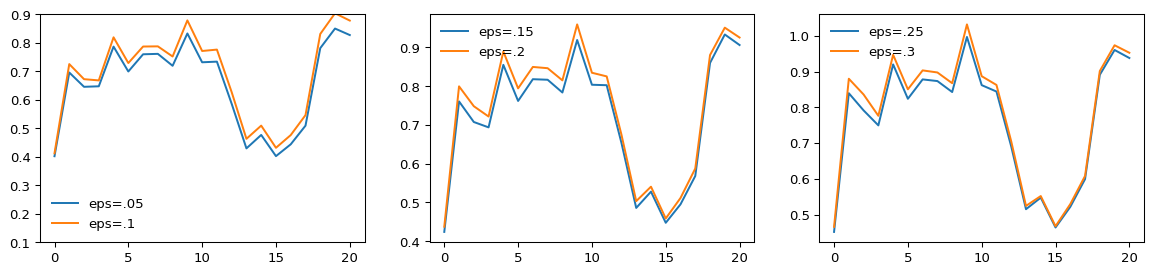

In [10]:
ylim = 0.9
ylow = 0.1 

fig = plt.figure(1, figsize=(15, 7), dpi=95)
plt.subplot(231)
plt.ylim(ylow, ylim)
plt.plot(ans_eps[0], label = 'eps=.05')
plt.plot(ans_eps[1], label = 'eps=.1')
plt.legend(frameon = False)
plt.subplot(232)
plt.plot(ans_eps[2], label = 'eps=.15')
plt.plot(ans_eps[3], label = 'eps=.2')
plt.legend(frameon = False)
plt.subplot(233)
plt.plot(ans_eps[4], label = 'eps=.25')
plt.plot(ans_eps[5], label = 'eps=.3')
plt.legend(frameon = False)

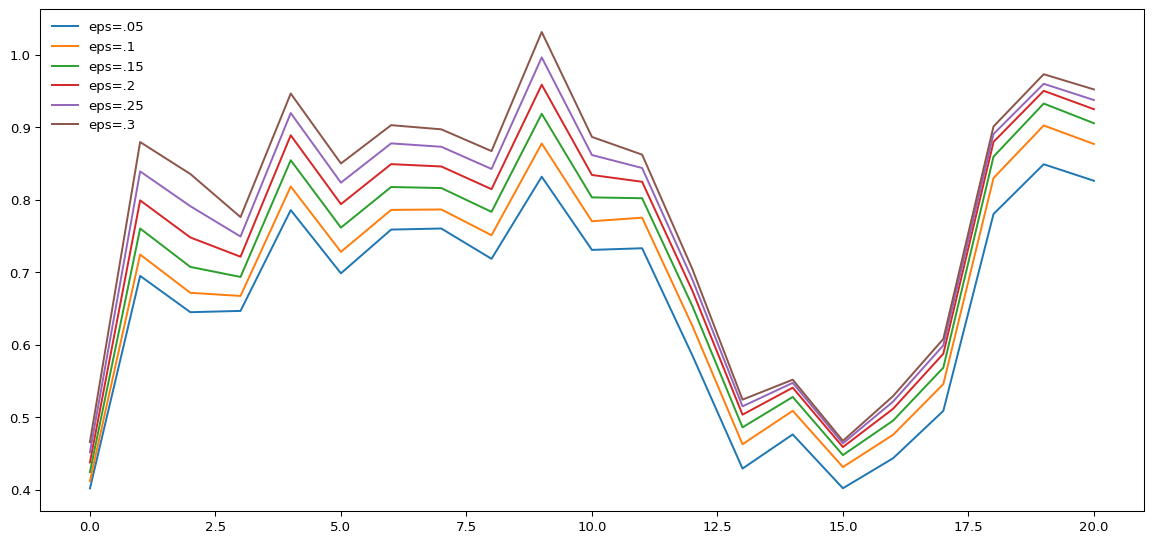

In [11]:
ylim = 0.9
ylow = 0.1 

fig = plt.figure(1, figsize=(15, 7), dpi=95)
#plt.subplot(231)
#plt.ylim(ylow, ylim)
plt.plot(ans_eps[0], label = 'eps=.05')
plt.plot(ans_eps[1], label = 'eps=.1')
plt.plot(ans_eps[2], label = 'eps=.15')
plt.plot(ans_eps[3], label = 'eps=.2')
plt.plot(ans_eps[4], label = 'eps=.25')
plt.plot(ans_eps[5], label = 'eps=.3')
plt.legend(frameon = False)

In [12]:
bits=[]
for i in range(21):
    a = torch.mul(ans_eps[0][i],8).round()
    bits.append(a.detach().cpu())
bits

[tensor(3.),
 tensor(6.),
 tensor(5.),
 tensor(5.),
 tensor(6.),
 tensor(6.),
 tensor(6.),
 tensor(6.),
 tensor(6.),
 tensor(7.),
 tensor(6.),
 tensor(6.),
 tensor(5.),
 tensor(3.),
 tensor(4.),
 tensor(3.),
 tensor(4.),
 tensor(4.),
 tensor(6.),
 tensor(7.),
 tensor(7.)]

In [0]:
# Making the activations k-bit. 
class BinActive2(torch.autograd.Function):
    '''
    Make the input activations k-bit
    '''
    def forward(self, input, k):
        self.save_for_backward(input)
        size = input.size()
        mean = torch.mean(input.abs(), 1, keepdim=True)
        x = input
        #print(x)
        xmax = x.abs().max()
        num_bits=k
        v0 = 1
        v1 = 2
        v2 = -0.5
        y = k#2.**num_bits - 1.
        #print(y)
        x = x.add(v0).div(v1)
        #print(x)
        x = x.mul(y).round_()
        #print(x)
        x = x.div(y)
        #print(x)
        x = x.add(v2)
        #print(x)
        x = x.mul(v1)
        #print(x)
        input = x
        return input, mean

    def backward(self, grad_output, grad_output_mean):
        input, = self.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input.ge(1)] = 0
        grad_input[input.le(-1)] = 0
        return grad_input, grad_input

In [115]:
a = Variable(torch.rand([1,1,1,1]))
a

tensor([[[[0.1332]]]])

In [116]:
k=Variable(torch.tensor([3]), requires_grad=False)
x1, mean = BinActive2()(a, k)
x1

tensor([[[[0.1332]]]])
tensor([7.])
tensor([[[[0.5666]]]])
tensor([[[[4.]]]])
tensor([[[[0.5714]]]])
tensor([[[[0.0714]]]])
tensor([[[[0.1429]]]])


/pytorch/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


tensor([[[[0.1429]]]])

In [0]:
#3	6	5	5	6	6	6	6	6	7	6	6	5	3	4	3	4	4	6	7	7


size_1 = 64
size_2 = 64
size_4 = 128
size_5 = 128
size_7 = 256
size_8 = 256
size_9 = 256
size_10 = 256
size_12 = 512
size_13 = 512
size_14 = 512
size_15 = 512
size_17 = 512
size_18 = 512
size_19 = 512
size_20 = 512

#bits=Variable(torch.tensor([3,6,5,5,6,6,6,6,6,7,6,6,5,3,4,3,4,4,6,7,7]).cuda(), requires_grad=False)

class Net_q(nn.Module):

    def __init__(self):
        super(Net_q, self).__init__()
        # 3 input channels for CIFAR10, VGG11 calls for 64 output channels from 
        # the first conv layer, a batchnorm, then a ReLU
        self.conv1 = nn.Conv2d(3, size_1, kernel_size = 3, padding = 1)
        self.norm1 = nn.BatchNorm2d(64)
        self.relu1 = nn.ReLU()
        
        #layer 2 is a conv that produces 64 channels, same format as layer 1
        self.conv2 = nn.Conv2d(size_1, size_2, kernel_size = 3, padding = 1)
        self.norm2 = nn.BatchNorm2d(size_1)
        self.relu2 = nn.ReLU()
        
        #layer 3 is a pooling layer
        self.pool3 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 4 is a conv that produces 128 channels, same format as layer 1
        self.conv4 = nn.Conv2d(size_2, size_4, kernel_size = 3, padding = 1)
        self.norm4 = nn.BatchNorm2d(size_4)
        self.relu4 = nn.ReLU()
        
        #layer 5 is a conv that produces 128 channels, same format as layer 1
        self.conv5 = nn.Conv2d(size_4, size_5, kernel_size = 3, padding = 1)
        self.norm5 = nn.BatchNorm2d(size_5)
        self.relu5 = nn.ReLU()
        
        #layer 6 is a pooling layer
        self.pool6 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 7 is a conv that produces 256 channels, same format as layer 1
        self.conv7 = nn.Conv2d(size_5, size_7, kernel_size = 3, padding = 1)
        self.norm7 = nn.BatchNorm2d(size_7)
        self.relu7 = nn.ReLU()
        
        #layer 8 is a conv that produces 256 channels, same format as layer 1
        self.conv8 = nn.Conv2d(size_7, size_8, kernel_size = 3, padding = 1)
        self.norm8 = nn.BatchNorm2d(size_8)
        self.relu8 = nn.ReLU()
        
        #layer 9 is a conv that produces 256 channels, same format as layer 1
        self.conv9 = nn.Conv2d(size_8, size_9, kernel_size = 3, padding = 1)
        self.norm9 = nn.BatchNorm2d(size_9)
        self.relu9 = nn.ReLU()
        
        #layer 10 is a conv that produces 256 channels, same format as layer 1
        self.conv10 = nn.Conv2d(size_9, size_10, kernel_size = 3, padding = 1)
        self.norm10 = nn.BatchNorm2d(size_10)
        self.relu10 = nn.ReLU()
        
        #layer 11 is a pooling layer
        self.pool11 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 12 is a conv that produces 512 channels, same format as layer 1
        self.conv12 = nn.Conv2d(size_10, size_12, kernel_size = 3, padding = 1)
        self.norm12 = nn.BatchNorm2d(size_12)
        self.relu12 = nn.ReLU()
        
        #layer 13 is a conv that produces 512 channels, same format as layer 1
        self.conv13 = nn.Conv2d(size_12, size_13, kernel_size = 3, padding = 1)
        self.norm13 = nn.BatchNorm2d(size_13)
        self.relu13 = nn.ReLU()
        
        #layer 14 is a conv that produces 512 channels, same format as layer 1
        self.conv14 = nn.Conv2d(size_13, size_14, kernel_size = 3, padding = 1)
        self.norm14 = nn.BatchNorm2d(size_14)
        self.relu14 = nn.ReLU()
        
        #layer 15 is a conv that produces 512 channels, same format as layer 1
        self.conv15 = nn.Conv2d(size_14, size_15, kernel_size = 3, padding = 1)
        self.norm15 = nn.BatchNorm2d(size_15)
        self.relu15 = nn.ReLU()
        
        #layer 16 is a pooling layer
        self.pool16 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 17 is a conv that produces 512 channels, same format as layer 1
        self.conv17 = nn.Conv2d(size_15, size_17, kernel_size = 3, padding = 1)
        self.norm17 = nn.BatchNorm2d(size_17)
        self.relu17 = nn.ReLU()
        
        #layer 18 is a conv that produces 512 channels, same format as layer 1
        self.conv18 = nn.Conv2d(size_17, size_18, kernel_size = 3, padding = 1)
        self.norm18 = nn.BatchNorm2d(size_18)
        self.relu18 = nn.ReLU()
        
        #layer 19 is a conv that produces 512 channels, same format as layer 1
        self.conv19 = nn.Conv2d(size_18, size_19, kernel_size = 3, padding = 1)
        self.norm19 = nn.BatchNorm2d(size_19)
        self.relu19 = nn.ReLU()
        
        #layer 20 is a conv that produces 512 channels, same format as layer 1
        self.conv20 = nn.Conv2d(size_19, size_20, kernel_size = 3, padding = 1)
        self.norm20 = nn.BatchNorm2d(size_20)
        self.relu20 = nn.ReLU()
        
        #layer 21 is a pooling layer
        self.pool21 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 22 is an average pooling layer
        self.pool22 = nn.AvgPool2d(kernel_size=1, stride=1)
        
        #layer 23 is a fully connected layer
        self.full23 = nn.Linear(size_20, 10)
        
        

    def forward(self, x0):
        x1 = self.conv1(x0)
        x1 = self.norm1(x1)
        x1 = self.relu1(x1)
        x1, mean = BinActive2()(x1, k[0])
        x2 = self.conv2(x1)
        x2 = self.norm2(x2)
        x2 = self.relu2(x2)
        x2, mean = BinActive2()(x2, k[1])
        x3 = self.pool3(x2)
        
        x4 = self.conv4(x3)
        x4 = self.norm4(x4)
        x4 = self.relu4(x4)
        x4, mean = BinActive2()(x4, k[3])
        x5 = self.conv5(x4)
        x5 = self.norm5(x5)
        x5 = self.relu5(x5)
        x5, mean = BinActive2()(x5, k[4])
        x6 = self.pool6(x5)
        
        x7 = self.conv7(x6)
        x7 = self.norm7(x7)
        x7 = self.relu7(x7)
        x7, mean = BinActive2()(x7, k[6])
        x8 = self.conv8(x7)
        x8 = self.norm8(x8)
        x8 = self.relu8(x8)
        x8, mean = BinActive2()(x8, k[7])
        x9 = self.conv9(x8)
        x9 = self.norm9(x9)
        x9 = self.relu9(x9)
        x9, mean = BinActive2()(x9, k[8])        
        x10 = self.conv10(x9)
        x10 = self.norm10(x10)
        x10 = self.relu10(x10)
        x10, mean = BinActive2()(x10, k[9])      
        x11 = self.pool11(x10)
        
        x12 = self.conv12(x11)
        x12 = self.norm12(x12)
        x12 = self.relu12(x12)
        x12, mean = BinActive2()(x12, k[11])      
        x13 = self.conv13(x12)
        x13 = self.norm13(x13)
        x13 = self.relu13(x13)
        x13, mean = BinActive2()(x13, k[12])       
        x14 = self.conv14(x13)
        x14 = self.norm14(x14)
        x14 = self.relu14(x14)
        x14, mean = BinActive2()(x14, k[13])       
        x15 = self.conv15(x14)
        x15 = self.norm15(x15)
        x15 = self.relu15(x15)
        x15, mean = BinActive2()(x15, k[14])     
        x16 = self.pool16(x15)
        
        x17 = self.conv17(x16)
        x17 = self.norm17(x17)
        x17 = self.relu17(x17)
        x17, mean = BinActive2()(x17, k[16])       
        x18 = self.conv18(x17)
        x18 = self.norm18(x18)
        x18 = self.relu18(x18)
        x18, mean = BinActive2()(x18, k[17])       
        x19 = self.conv19(x18)
        x19 = self.norm19(x19)
        x19 = self.relu19(x19)
        x19, mean = BinActive2()(x19, k[18])       
        x20 = self.conv20(x19)
        x20 = self.norm20(x20)
        x20 = self.relu20(x20)
        x20, mean = BinActive2()(x20, k[19])       
        x21 = self.pool21(x20)
        
        x22 = self.pool22(x21)
        
        x22 = x22.view(x20.size(0), -1)
        x23 = self.full23(x22)
        
        #return the activations from each layer as well as the output
        output = x23
        activations = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, x21]
        return output, activations

In [250]:
net_q = Net_q()
net_q = net_q.to(device)
net_q = torch.nn.DataParallel(net_q)
cudnn.benchmark = True

state_dict = torch.load('./sample_data/vgg19_net0.pth')
#from collections import OrderedDict
#new_state_dict = OrderedDict()
#for k, v in state_dict.items():
#    name = k[7:] # remove `module.`
#    new_state_dict[name] = v
# load params
net_q.load_state_dict(state_dict)

<All keys matched successfully>

In [0]:
from torch.autograd import Variable
def test_clean_q(epoch):
    net_q.eval()
    test_loss = 0
    correct = 0
    total = 0
    activations = []
    previous_time = time.process_time()
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
           
            inputs, targets = inputs.to(device), targets.to(device)
            outputs, activations = net_q(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            acc = correct/total*100
        return acc, activations

In [0]:
global k
#k=Variable(torch.tensor([255, 255, 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255]), requires_grad=False)
k=Variable(torch.tensor([248,	4,	224,	224,	4,	4,	4,	4,	4,	4,	4,	4,	224,	240,	240,	248,	240,	240,	128,	128,	248]).cuda(), requires_grad=False)
accuracies_clean = []
activations_clean = []
#epsilons = [0, .05, .1, .15, .2, .25, .3]
device = torch.device("cuda")
# Run test for each epsilon
acc, act = test_clean_q(1)
accuracies_clean.append(acc)
activations_clean.append(act)
#print(accuracies_clean)

In [261]:
accuracies_clean

[67.81]

In [0]:
global k
bits=Variable(torch.tensor([16, 8, 6, 5, 4, 3, 2, 1]).cuda(), requires_grad=False)
accuracies_adv = []
epsilons = [0]#[0, .05, .1, .15, .2, .25, .3]
device = torch.device("cuda")
# Run test for each epsilon
for eps in epsilons:
  for i in range(bits.size()[0]):
    k = bits[i]
    acc, _ = test_attack(net_q, device, testloader, eps)
    accuracies_adv.append(acc)

In [56]:
accuracies_adv

[80.55, 81.0, 75.5, 19.46, 10.0, 10.0, 19.88]

In [265]:
global k
k=Variable(torch.tensor([248,	4,	224,	224,	4,	4,	4,	4,	4,	4,	4,	4,	224,	240,	240,	248,	240,	240,	128,	128,	248]).cuda(), requires_grad=False)
#k=Variable(torch.tensor([248,	192,	224,	224,	128,	192,	192,	192,	192,	128,	192,	192,	224,	240,	240,	248,	240,	240,	128,	128,	248]).cuda(), requires_grad=False)
accuracies_adv = []
epsilons = [.05]#[0, .05, .1, .15, .2, .25, .3]
device = torch.device("cuda")
# Run test for each epsilon
for eps in epsilons:
    acc, _ = test_attack(net_q, device, testloader, eps)
    accuracies_adv.append(acc)

/pytorch/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/pytorch/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/pytorch/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/pytorch/torch/csrc/autograd/python_function.cpp:622: UserWar

Epsilon: 0.05	Test Accuracy = 2048 / 100 = 20.48


/pytorch/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/pytorch/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/pytorch/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/pytorch/torch/csrc/autograd/python_function.cpp:622: UserWar

In [266]:
accuracies_adv

[20.48]

In [0]:
import torch.nn as nn
import numpy

class BinOp():
    def __init__(self, model):
        # count the number of Conv2d
        count_Conv2d = 0
        for m in model.modules():
            if isinstance(m, nn.Conv2d):
                count_Conv2d = count_Conv2d + 1
        print(count_Conv2d)
        start_range = 1
        end_range = count_Conv2d
        self.bin_range = numpy.linspace(start_range,
                end_range, end_range-start_range+1)\
                        .astype('int').tolist()
        print(self.bin_range)
        #kbit_conn = numpy.array([0, 1, 2, 4, 6, 7, 8, 9, 11, 12,13, 14, 16, 17, 18, 19]) #layers whose weights need to be made k-bit
        #kbit_conn = kbit_conn.astype('int').tolist()
        #print(kbit_conn)
        #raw_input()
        self.num_of_params = len(self.bin_range)
        self.saved_params = []
        self.target_params = []
        self.target_modules = []
        index = -1
        print(self.num_of_params)
        for m in model.modules():
            if isinstance(m, nn.Conv2d):
                print(m)
                index = index + 1
                #if index in self.bin_range:
                #    tmp = m.weight.data.clone()
                #    self.saved_params.append(tmp)
                #    self.target_modules.append(m.weight)
                #if index in kbit_conn:
                print('Making k-bit') #Know which layers weights are being made k-bit
                    #raw_input()
                tmp = m.weight.data.clone()
                self.saved_params.append(tmp)
                self.target_modules.append(m.weight)

    def binarization(self):
        #self.meancenterConvParams()
        #self.clampConvParams()
        self.save_params()
        self.binarizeConvParams()

    def meancenterConvParams(self):
        for index in range(self.num_of_params):
            s = self.target_modules[index].data.size()
            print(index)
            print(s)
            negMean = self.target_modules[index].data.mean(1, keepdim=True).\
                    mul(-1).expand_as(self.target_modules[index].data)
            self.target_modules[index].data = self.target_modules[index].data.add(negMean)

    def clampConvParams(self):
        for index in range(self.num_of_params):
            self.target_modules[index].data = \
                    self.target_modules[index].data.clamp(-1.0, 1.0)

    def save_params(self):
        for index in range(self.num_of_params):
            self.saved_params[index].copy_(self.target_modules[index].data)

    def binarizeConvParams(self):
        #kbit_conn = numpy.array([0, 1, 3, 4, 6, 7, 8, 9, 11, 12,13, 14, 16, 17, 18, 19])
        #num_bits = numpy.array([65408	,61440	,63488	,63488	,57344	,61440	,57344	,57344	,61440	,49152	,61440	,61440
        #                        ,64512	,65408	,65280	,65408	,65280	,65024	,57344	,49152	,65408])#numpy.array([255,	192,	224,	224,	128,	192,	192,	192,	192,	128,	192,	192,	224,	240,	240,	248,	240,	240,	128,	128,	255])
        num_bits = numpy.array([65408	,255	,255	,255	,255	,255 ,255	,255	,255	,255	,255,255	,65408	,65280	,65408	,65280	,65024	,255	,49152	,65408])
        
        #kbit_conn = kbit_conn.astype('int').tolist()
        for index in range(self.num_of_params):
            #n = self.target_modules[index].data[0].nelement()
            #s = self.target_modules[index].data.size()
            #m = self.target_modules[index].data.norm(1, 3, keepdim=True)\
            #        .sum(2, keepdim=True).sum(1, keepdim=True).div(n)

            #if index in kbit_conn:
	    	    #k-bit weights
            x = self.target_modules[index].data
            xmax = x.abs().max()
            v0 = 1
            v1 = 2
            v2 = -0.5
            y = num_bits[index]#2.**num_bits[index] - 1.
            x = x.add(v0).div(v1)
            x = x.mul(y).round_()
            x = x.div(y)
            x = x.add(v2)
            x = x.mul(v1)
            self.target_modules[index].data = x#.mul(m.expand(s))
            #self.target_modules[index].data = \
            #        self.target_modules[index].data.sign().mul(m.expand(s))

    def restore(self):
        for index in range(self.num_of_params):
            self.target_modules[index].data.copy_(self.saved_params[index])

    def updateBinaryGradWeight(self):
        for index in range(self.num_of_params):
            weight = self.target_modules[index].data
            n = weight[0].nelement()
            s = weight.size()
            m = weight.norm(1, 3, keepdim=True)\
                    .sum(2, keepdim=True).sum(1, keepdim=True).div(n).expand(s)
            m[weight.lt(-1.0)] = 0 
            m[weight.gt(1.0)] = 0
            # m = m.add(1.0/n).mul(1.0-1.0/s[1]).mul(n)
            # self.target_modules[index].grad.data = \
            #         self.target_modules[index].grad.data.mul(m)
            m = m.mul(self.target_modules[index].grad.data)
            m_add = weight.sign().mul(self.target_modules[index].grad.data)
            m_add = m_add.sum(3, keepdim=True)\
                    .sum(2, keepdim=True).sum(1, keepdim=True).div(n).expand(s)
            m_add = m_add.mul(weight.sign())
            self.target_modules[index].grad.data = m.add(m_add).mul(1.0-1.0/s[1]).mul(n)

In [0]:

def test_attack_quant( model, device, test_loader, epsilon ):
   # define the binarization operator
    bin_op = BinOp(model)
    model.eval()
    # Accuracy counter
    correct, correct_adv = 0, 0
    adv_examples = []
    bin_op.binarization()
    # Loop over all examples in test set
    for data, target in testloader:

        # Send the data and label to the device
        data, target = data.to(device), target.to(device)

        # Set requires_grad attribute of tensor. Important for Attack
        data.requires_grad = True

        # Forward pass the data through the model
        output, _ = model(data)
        #_, predicted = output.max(1)
        #print(predicted)
        #total += targets.size(0)
        #correct += predicted.eq(target).sum().item()
        #init_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        #print(target)
        # If the initial prediction is wrong, dont bother attacking, just move on
        #if predicted != target:
        #    continue

        # Calculate the loss
        loss = F.nll_loss(output, target)

        # Zero all existing gradients
        model.zero_grad()

        # Calculate gradients of model in backward pass
        loss.backward()

        # Collect datagrad
        data_grad = data.grad.data

        # Call FGSM Attack
        perturbed_data = fgsm_attack(data, epsilon, data_grad)

        # Re-classify the perturbed image
        output, activations_adv = model(perturbed_data)

        # Check for success
        #final_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        _, final_predicted = output.max(1)
        correct_adv += final_predicted.eq(target).sum().item()
        #if final_pred.item() == target.item():
        #    correct += 1
            # Special case for saving 0 epsilon examples
            #if (epsilon == 0) and (len(adv_examples) < 5):
            #    adv_ex = perturbed_data.squeeze().detach().cpu().numpy()
            #    adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex) )
        #else:
            # Save some adv examples for visualization later
        #    if len(adv_examples) < 5:
        #        adv_ex = perturbed_data.squeeze().detach().cpu().numpy()
        #        adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex) )

    # Calculate final accuracy for this epsilon
    #final_acc = correct/float(len(testloader))
    bin_op.restore()
    final_advacc = correct_adv/float(len(testloader))
    print("Epsilon: {}\tTest Accuracy = {} / {} = {}".format(epsilon, correct_adv, len(testloader), final_advacc))
    #print("True accuracy {}".format(final_acc))
    # Return the accuracy and an adversarial example
    return final_advacc, activations_adv


In [0]:
global k
k=Variable(torch.tensor([248,	192,	224,	224,	128,	192,	192,	192,	192,	128,	192,	192,	224,	240,	240,	248,	240,	240,	128,	128,	248]).cuda(), requires_grad=False)
accuracies_adv = []
epsilons = [0, .05, .1, .15, .2, .25, .3]
device = torch.device("cuda")
# Run test for each epsilon
for eps in epsilons:
    acc, _ = test_attack_quant(net_q, device, testloader, eps)
    accuracies_adv.append(acc)

In [217]:
accuracies_adv

[75.93, 23.27, 18.85, 16.11, 14.45, 13.08, 12.53]

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


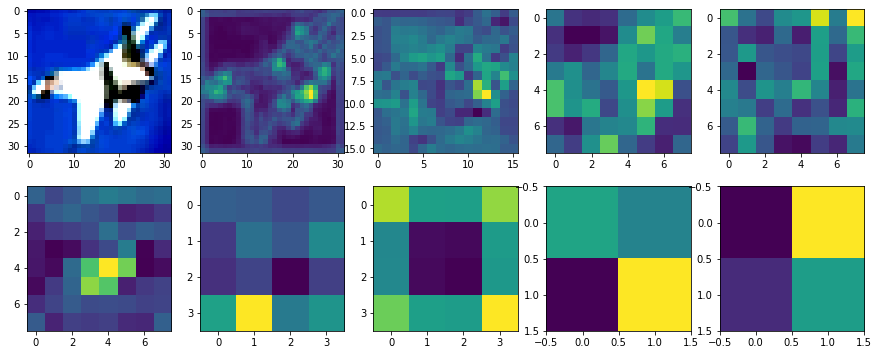

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


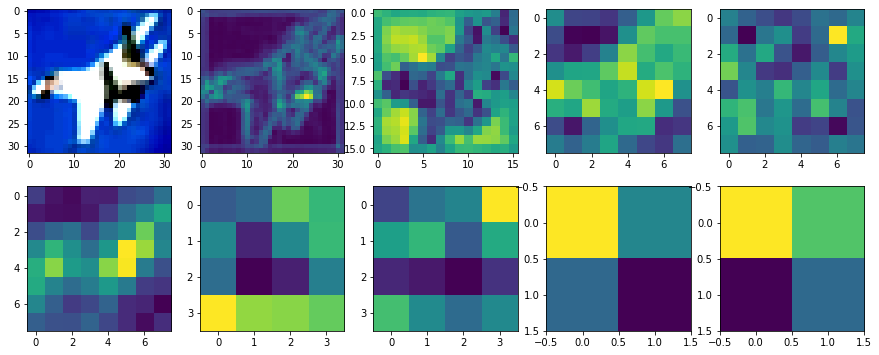

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


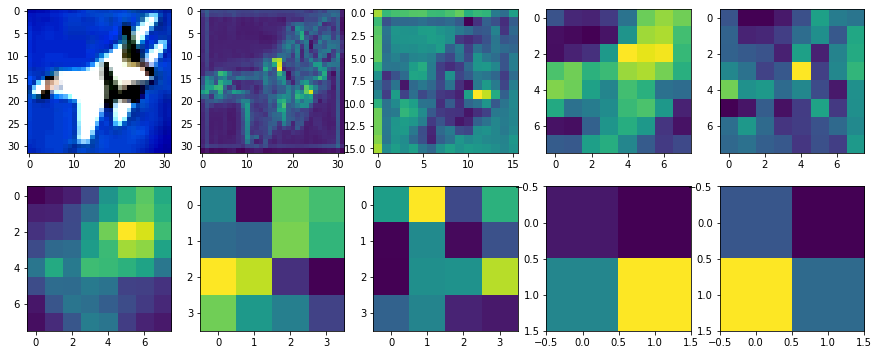

In [0]:
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

img_num = 10

for batch_idx, (inputs, targets) in enumerate(testloader):
    inputs, targets = inputs.to('cuda'), targets.to('cuda')
    img = inputs[img_num].cpu()
    if (batch_idx == 0):
        break


image = torch.zeros([1, 3, 32, 32])     #initialize the image as a 4D array
image[0,:,:,:] = img
image = image.to('cuda')
outputs0, activations0 = net0(image)    #pass image i through the network
outputs1, activations1 = net1(image)
outputs2, activations2 = net2(image)

filter_out0 = []
for x in activations0:
    x = x.cpu().detach().numpy()
    y = np.mean(x, axis = 1)
    filter_out0.append(y[0,:,:])

img = image[0,:,:,:].cpu()
img = img.permute(1,2,0)
f, axarr = plt.subplots(2,5, figsize=(15, 6))
axarr[0,0].imshow(img)
axarr[0,1].imshow(filter_out0[1])
axarr[0,2].imshow(filter_out0[3])
axarr[0,3].imshow(filter_out0[5])
axarr[0,4].imshow(filter_out0[7])
axarr[1,0].imshow(filter_out0[9])
axarr[1,1].imshow(filter_out0[11])
axarr[1,2].imshow(filter_out0[13])
axarr[1,3].imshow(filter_out0[15])
axarr[1,4].imshow(filter_out0[17])
plt.show()

filter_out1 = []
for x in activations1:
    x = x.cpu().detach().numpy()
    y = np.mean(x, axis = 1)
    filter_out1.append(y[0,:,:])

img = image[0,:,:,:].cpu()
img = img.permute(1,2,0)
f, axarr = plt.subplots(2,5, figsize=(15, 6))
axarr[0,0].imshow(img)
axarr[0,1].imshow(filter_out1[1])
axarr[0,2].imshow(filter_out1[3])
axarr[0,3].imshow(filter_out1[5])
axarr[0,4].imshow(filter_out1[7])
axarr[1,0].imshow(filter_out1[9])
axarr[1,1].imshow(filter_out1[11])
axarr[1,2].imshow(filter_out1[13])
axarr[1,3].imshow(filter_out1[15])
axarr[1,4].imshow(filter_out1[17])
plt.show()

filter_out2 = []
for x in activations2:
    x = x.cpu().detach().numpy()
    y = np.mean(x, axis = 1)
    filter_out2.append(y[0,:,:])

img = image[0,:,:,:].cpu()
img = img.permute(1,2,0)
f, axarr = plt.subplots(2,5, figsize=(15, 6))
axarr[0,0].imshow(img)
axarr[0,1].imshow(filter_out2[1])
axarr[0,2].imshow(filter_out2[3])
axarr[0,3].imshow(filter_out2[5])
axarr[0,4].imshow(filter_out2[7])
axarr[1,0].imshow(filter_out2[9])
axarr[1,1].imshow(filter_out2[11])
axarr[1,2].imshow(filter_out2[13])
axarr[1,3].imshow(filter_out2[15])
axarr[1,4].imshow(filter_out2[17])
plt.show()

Text(0.5, 0.98, 'Fractional activation energy (sparsity) vs. epoch')

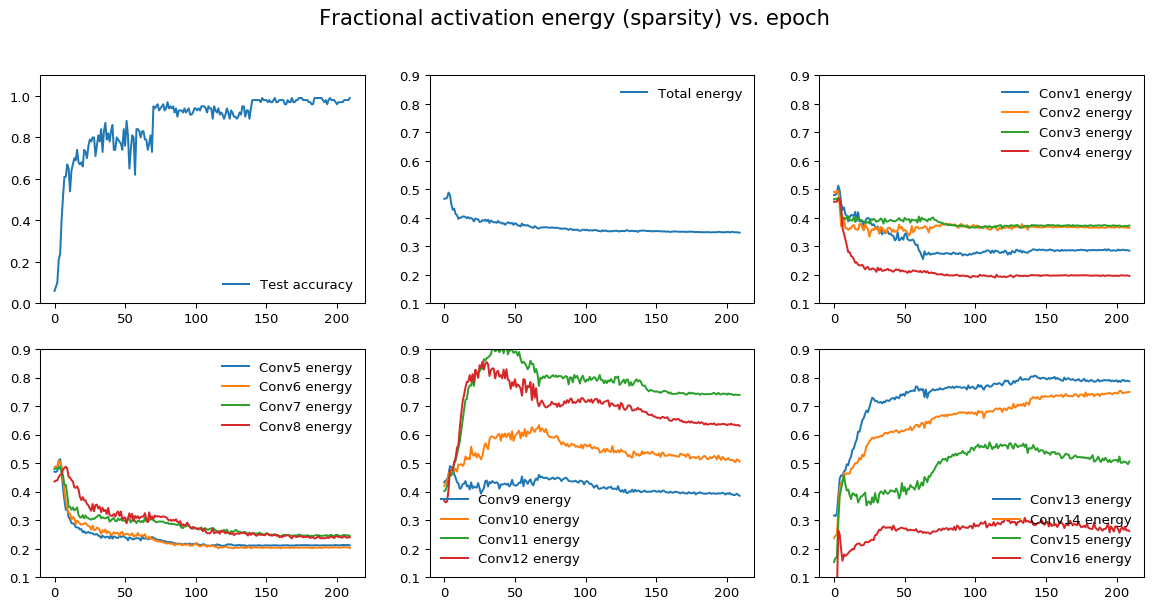

In [0]:

total_energy = fractional_layer_energies[:,0]
conv1_energy = fractional_layer_energies[:,1]
conv2_energy = fractional_layer_energies[:,2]
conv3_energy = fractional_layer_energies[:,4]
conv4_energy = fractional_layer_energies[:,5]
conv5_energy = fractional_layer_energies[:,7]
conv6_energy = fractional_layer_energies[:,8]
conv7_energy = fractional_layer_energies[:,9]
conv8_energy = fractional_layer_energies[:,10]
conv9_energy = fractional_layer_energies[:,12]
conv10_energy = fractional_layer_energies[:,13]
conv11_energy = fractional_layer_energies[:,14]
conv12_energy = fractional_layer_energies[:,15]
conv13_energy = fractional_layer_energies[:,17]
conv14_energy = fractional_layer_energies[:,18]
conv15_energy = fractional_layer_energies[:,19]
conv16_energy = fractional_layer_energies[:,20]



ylim = 0.9
ylow = 0.1 

fig = plt.figure(1, figsize=(15, 7), dpi=95)
plt.subplot(231)
plt.ylim(0, 1.1)
plt.plot(test_acc, label = 'Test accuracy')
plt.legend(frameon = False)

plt.subplot(232)
plt.ylim(ylow, ylim)
plt.plot(total_energy, label = 'Total energy')
plt.legend(frameon = False)

plt.subplot(233)
plt.ylim(ylow, ylim)
plt.plot(conv1_energy, label = 'Conv1 energy')
plt.plot(conv2_energy, label = 'Conv2 energy')
plt.plot(conv3_energy, label = 'Conv3 energy')
plt.plot(conv4_energy, label = 'Conv4 energy')
plt.legend(frameon = False)

plt.subplot(234)
plt.ylim(ylow, ylim)
plt.plot(conv5_energy, label = 'Conv5 energy')
plt.plot(conv6_energy, label = 'Conv6 energy')
plt.plot(conv7_energy, label = 'Conv7 energy')
plt.plot(conv8_energy, label = 'Conv8 energy')
plt.legend(frameon = False)

plt.subplot(235)
plt.ylim(ylow, ylim)
plt.plot(conv9_energy, label = 'Conv9 energy')
plt.plot(conv10_energy, label = 'Conv10 energy')
plt.plot(conv11_energy, label = 'Conv11 energy')
plt.plot(conv12_energy, label = 'Conv12 energy')
plt.legend(frameon = False)

plt.subplot(236)
plt.ylim(ylow, ylim)
plt.plot(conv13_energy, label = 'Conv13 energy')
plt.plot(conv14_energy, label = 'Conv14 energy')
plt.plot(conv15_energy, label = 'Conv15 energy')
plt.plot(conv16_energy, label = 'Conv16 energy')
plt.legend(frameon = False)


fig.suptitle('Fractional activation energy (sparsity) vs. epoch', fontsize = 16)

In [0]:
torch.save(net.state_dict(),'./sample_data/vgg19_0.pth')

In [0]:
'''Prune the network'''

epoch = 209

size_1 = 18
size_2 = 23
size_4 = 47
size_5 = 25
size_7 = 54
size_8 = 51
size_9 = 62
size_10 = 61
size_12 = 197
size_13 = 258
size_14 = 378
size_15 = 322
size_17 = 402
size_18 = 383
size_19 = 259
size_20 = 134

# size_1 = int(fractional_layer_energies[epoch,1] * 64)
# size_2 = int(fractional_layer_energies[epoch,2] * 64)
# size_4 = int(fractional_layer_energies[epoch,4] * 128)
# size_5 = int(fractional_layer_energies[epoch,5] * 128)
# size_7 = int(fractional_layer_energies[epoch,7] * 256)
# size_8 = int(fractional_layer_energies[epoch,8] * 256)
# size_9 = int(fractional_layer_energies[epoch,9] * 256)
# size_10 = int(fractional_layer_energies[epoch,10] * 256)
# size_12 = int(fractional_layer_energies[epoch,12] * 512)
# size_13 = int(fractional_layer_energies[epoch,13] * 512)
# size_14 = int(fractional_layer_energies[epoch,14] * 512)
# size_15 = int(fractional_layer_energies[epoch,15] * 512)
# size_17 = int(fractional_layer_energies[epoch,17] * 512)
# size_18 = int(fractional_layer_energies[epoch,18] * 512)
# size_19 = int(fractional_layer_energies[epoch,19] * 512)
# size_20 = int(fractional_layer_energies[epoch,20] * 512)
print(size_1,size_2,size_4,size_5,size_7,size_8,size_9, size_10, size_12, size_13, size_14, size_15, size_17, size_18, size_19, size_20)


class Net1(nn.Module):

    def __init__(self):
        super(Net1, self).__init__()
        # print(size_1)
        # 3 input channels for CIFAR10, VGG11 calls for 64 output channels from 
        # the first conv layer, a batchnorm, then a ReLU
        self.conv1 = nn.Conv2d(3, size_1, kernel_size = 3, padding = 1)
        self.norm1 = nn.BatchNorm2d(size_1)
        self.relu1 = nn.ReLU()
        
        #layer 2 is a conv that produces 64 channels, same format as layer 1
        self.conv2 = nn.Conv2d(size_1, size_2, kernel_size = 3, padding = 1)
        self.norm2 = nn.BatchNorm2d(size_2)
        self.relu2 = nn.ReLU()
        
        #layer 3 is a pooling layer
        self.pool3 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 4 is a conv that produces 128 channels, same format as layer 1
        self.conv4 = nn.Conv2d(size_2, size_4, kernel_size = 3, padding = 1)
        self.norm4 = nn.BatchNorm2d(size_4)
        self.relu4 = nn.ReLU()
        
        #layer 5 is a conv that produces 128 channels, same format as layer 1
        self.conv5 = nn.Conv2d(size_4, size_5, kernel_size = 3, padding = 1)
        self.norm5 = nn.BatchNorm2d(size_5)
        self.relu5 = nn.ReLU()
        
        #layer 6 is a pooling layer
        self.pool6 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 7 is a conv that produces 256 channels, same format as layer 1
        self.conv7 = nn.Conv2d(size_5, size_7, kernel_size = 3, padding = 1)
        self.norm7 = nn.BatchNorm2d(size_7)
        self.relu7 = nn.ReLU()
        
        #layer 8 is a conv that produces 256 channels, same format as layer 1
        self.conv8 = nn.Conv2d(size_7, size_8, kernel_size = 3, padding = 1)
        self.norm8 = nn.BatchNorm2d(size_8)
        self.relu8 = nn.ReLU()
        
        #layer 9 is a conv that produces 256 channels, same format as layer 1
        self.conv9 = nn.Conv2d(size_8, size_9, kernel_size = 3, padding = 1)
        self.norm9 = nn.BatchNorm2d(size_9)
        self.relu9 = nn.ReLU()
        
        #layer 10 is a conv that produces 256 channels, same format as layer 1
        self.conv10 = nn.Conv2d(size_9, size_10, kernel_size = 3, padding = 1)
        self.norm10 = nn.BatchNorm2d(size_10)
        self.relu10 = nn.ReLU()
        
        #layer 11 is a pooling layer
        self.pool11 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 12 is a conv that produces 512 channels, same format as layer 1
        self.conv12 = nn.Conv2d(size_10, size_12, kernel_size = 3, padding = 1)
        self.norm12 = nn.BatchNorm2d(size_12)
        self.relu12 = nn.ReLU()
        
        #layer 13 is a conv that produces 512 channels, same format as layer 1
        self.conv13 = nn.Conv2d(size_12, size_13, kernel_size = 3, padding = 1)
        self.norm13 = nn.BatchNorm2d(size_13)
        self.relu13 = nn.ReLU()
        
        #layer 14 is a conv that produces 512 channels, same format as layer 1
        self.conv14 = nn.Conv2d(size_13, size_14, kernel_size = 3, padding = 1)
        self.norm14 = nn.BatchNorm2d(size_14)
        self.relu14 = nn.ReLU()
        
        #layer 15 is a conv that produces 512 channels, same format as layer 1
        self.conv15 = nn.Conv2d(size_14, size_15, kernel_size = 3, padding = 1)
        self.norm15 = nn.BatchNorm2d(size_15)
        self.relu15 = nn.ReLU()
        
        #layer 16 is a pooling layer
        self.pool16 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 17 is a conv that produces 512 channels, same format as layer 1
        self.conv17 = nn.Conv2d(size_15, size_17, kernel_size = 3, padding = 1)
        self.norm17 = nn.BatchNorm2d(size_17)
        self.relu17 = nn.ReLU()
        
        #layer 18 is a conv that produces 512 channels, same format as layer 1
        self.conv18 = nn.Conv2d(size_17, size_18, kernel_size = 3, padding = 1)
        self.norm18 = nn.BatchNorm2d(size_18)
        self.relu18 = nn.ReLU()
        
        #layer 19 is a conv that produces 512 channels, same format as layer 1
        self.conv19 = nn.Conv2d(size_18, size_19, kernel_size = 3, padding = 1)
        self.norm19 = nn.BatchNorm2d(size_19)
        self.relu19 = nn.ReLU()
        
        #layer 20 is a conv that produces 512 channels, same format as layer 1
        self.conv20 = nn.Conv2d(size_19, size_20, kernel_size = 3, padding = 1)
        self.norm20 = nn.BatchNorm2d(size_20)
        self.relu20 = nn.ReLU()
        
        #layer 21 is a pooling layer
        self.pool21 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 22 is an average pooling layer
        self.pool22 = nn.AvgPool2d(kernel_size=1, stride=1)
        
        #layer 23 is a fully connected layer
        self.full23 = nn.Linear(size_20, 10)
        
        

    def forward(self, x0):
        x1 = self.conv1(x0)
        x1 = self.norm1(x1)
        x1 = self.relu1(x1)
        
        x2 = self.conv2(x1)
        x2 = self.norm2(x2)
        x2 = self.relu2(x2)
        
        x3 = self.pool3(x2)
        
        x4 = self.conv4(x3)
        x4 = self.norm4(x4)
        x4 = self.relu4(x4)
        
        x5 = self.conv5(x4)
        x5 = self.norm5(x5)
        x5 = self.relu5(x5)
        
        x6 = self.pool6(x5)
        
        x7 = self.conv7(x6)
        x7 = self.norm7(x7)
        x7 = self.relu7(x7)
        
        x8 = self.conv8(x7)
        x8 = self.norm8(x8)
        x8 = self.relu8(x8)
        
        x9 = self.conv9(x8)
        x9 = self.norm9(x9)
        x9 = self.relu9(x9)
        
        x10 = self.conv10(x9)
        x10 = self.norm10(x10)
        x10 = self.relu10(x10)
        
        x11 = self.pool11(x10)
        
        x12 = self.conv12(x11)
        x12 = self.norm12(x12)
        x12 = self.relu12(x12)
        
        x13 = self.conv13(x12)
        x13 = self.norm13(x13)
        x13 = self.relu13(x13)
        
        x14 = self.conv14(x13)
        x14 = self.norm14(x14)
        x14 = self.relu14(x14)
        
        x15 = self.conv15(x14)
        x15 = self.norm15(x15)
        x15 = self.relu15(x15)
        
        x16 = self.pool16(x15)
        
        x17 = self.conv17(x16)
        x17 = self.norm17(x17)
        x17 = self.relu17(x17)
        
        x18 = self.conv18(x17)
        x18 = self.norm18(x18)
        x18 = self.relu18(x18)
        
        x19 = self.conv19(x18)
        x19 = self.norm19(x19)
        x19 = self.relu19(x19)
        
        x20 = self.conv20(x19)
        x20 = self.norm20(x20)
        x20 = self.relu20(x20)
       
        x21 = self.pool21(x20)
        
        x22 = self.pool22(x21)
        
        x22 = x22.view(x20.size(0), -1)
        x23 = self.full23(x22)
        
        #return the activations from each layer as well as the output
        output = x23
        activations = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x12, x13, x14, x15, x17, x18, x19, x20]
        return output, activations

18 23 47 25 54 51 62 61 197 258 378 322 402 383 259 134


In [0]:
print('==> Building model..')

num_epochs = 210
num_layers = 21
best_acc = 0

absolute_layer_energies1 = np.zeros((num_epochs, num_layers))
fractional_layer_energies1 = np.zeros((num_epochs, num_layers))

net1 = Net1()
net1 = net1.to(device)
net1 = torch.nn.DataParallel(net1)
cudnn.benchmark = True

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net1.parameters(), lr=0.05, momentum=0.9, weight_decay=5e-4)

# Training
def train(epoch):
    print('\nEpoch: %d' % epoch)
    net1.train()
    train_loss = 0
    correct = 0
    total = 0
    activations = []
    global absolute_layer_energies
    global fractional_layer_energies
    previous_time = time.process_time()
    
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs, activations = net1(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        if batch_idx%100==0:
            current_time = time.process_time()
            print(batch_idx, len(testloader), 'Lap time (s): %.2f | Loss: %.3f | Acc: %.3f%% (%d/%d)'
                    % (current_time - previous_time, train_loss/(batch_idx+1), 100.*correct/total, correct, total))
            previous_time = current_time
            
    this_epoch_abs_energies, this_epoch_frac_energies = count_non_zeros(activations)
    fractional_layer_energies1[epoch] = this_epoch_frac_energies
    absolute_layer_energies1[epoch] = this_epoch_abs_energies
    print('Total activation density: %.3f' % (fractional_layer_energies1[epoch, 0]))


def test(epoch):
    global best_acc
    net1.eval()
    test_loss = 0
    correct = 0
    total = 0
    activations = []
    previous_time = time.process_time()
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs, activations = net1(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            acc = correct/total
            best_acc = max(acc, best_acc)
            if batch_idx%100 == 0:
                current_time = time.process_time()
                print(batch_idx, len(testloader), 'Lap time (s): %.2f | Loss: %.3f | Acc: %.3f%% (%d/%d) | Best acc: %.3f'
                    % (current_time - previous_time, test_loss/(batch_idx+1), 100.*correct/total, correct, total, best_acc))
                previous_time = current_time


def count_non_zeros(activations): 
    
    #returns: numpy array containing the number of non-zero activations per layer (15x1)
    #         numpy array containing the fraction of non-zero activations per layer (15x1)
    
    n = 0
    num_zeros = np.zeros((num_layers,), dtype = int)
    num_non_zeros = np.zeros((num_layers,), dtype = int)
    total_activations = np.zeros((num_layers,), dtype = int)
    fraction_non_zero = np.zeros((num_layers,), dtype = float)
    for x in activations:
        n += 1
        #reshape activations into a flat list
        num_activations = x.size()[0] * x.size()[1] * x.size()[2] * x.size()[3]
        
        y = x.view(num_activations).tolist()
        
        #count how many entries are zero / non-zero
        num_zeros[n] = y.count(0)
        total_activations[n] = num_activations
        num_non_zeros[n] = len(y) - num_zeros[n]
        fraction_non_zero[n] = num_non_zeros[n].astype(float)/float(len(y))
        #print(n, num_non_zeros[n], len(y), '%.3f' % (fraction_non_zero[n]))
        
    #store total values in the zero slot
    num_non_zeros[0] = np.sum(num_non_zeros) 
    total_activations[0] = np.sum(total_activations)
    fraction_non_zero[0] = num_non_zeros[0].astype(float)/total_activations[0].astype(float)
    return num_non_zeros, fraction_non_zero

for epoch in range(300):
    if (epoch == 70):
        optimizer = optim.SGD(net.parameters(), lr=0.005, momentum=0.9, weight_decay=5e-4)
    if (epoch == 140):
        optimizer = optim.SGD(net.parameters(), lr=0.0005, momentum=0.9, weight_decay=5e-4)
    train(epoch)
    test(epoch)
    print('Elapsed time: %.2f' % (time.process_time()))
    

==> Building model..

Epoch: 0
0 100 Lap time (s): 0.29 | Loss: 2.652 | Acc: 9.375% (12/128)
100 100 Lap time (s): 2.05 | Loss: 2.366 | Acc: 12.461% (1611/12928)
200 100 Lap time (s): 2.05 | Loss: 2.233 | Acc: 14.956% (3848/25728)
300 100 Lap time (s): 2.03 | Loss: 2.131 | Acc: 17.206% (6629/38528)
Total activation density: 0.494
0 100 Lap time (s): 0.18 | Loss: 1.868 | Acc: 25.000% (25/100) | Best acc: 0.250
Elapsed time: 4831.08

Epoch: 1
0 100 Lap time (s): 0.09 | Loss: 1.898 | Acc: 21.875% (28/128)
100 100 Lap time (s): 2.04 | Loss: 1.850 | Acc: 26.129% (3378/12928)
200 100 Lap time (s): 2.03 | Loss: 1.833 | Acc: 26.722% (6875/25728)
300 100 Lap time (s): 2.03 | Loss: 1.793 | Acc: 28.161% (10850/38528)
Total activation density: 0.493
0 100 Lap time (s): 0.07 | Loss: 1.456 | Acc: 38.000% (38/100) | Best acc: 0.380
Elapsed time: 4840.39

Epoch: 2
0 100 Lap time (s): 0.09 | Loss: 1.488 | Acc: 41.406% (53/128)
100 100 Lap time (s): 2.08 | Loss: 1.579 | Acc: 39.117% (5057/12928)
200 100

IndexError: ignored

In [0]:
torch.save(net.state_dict(),'./sample_data/vgg19_1.pth')

In [0]:
'''Prune the network'''

epoch = 209

size_1 = 10
size_2 = 9
size_4 = 30
size_5 = 11
size_7 = 21
size_8 = 31
size_9 = 22
size_10 = 21
size_12 = 62
size_13 = 70
size_14 = 113
size_15 = 141
size_17 = 256
size_18 = 299
size_19 = 194
size_20 = 71

# size_1 = int(fractional_layer_energies1[epoch,1] * size_1)
# size_2 = int(fractional_layer_energies1[epoch,2] * size_2)
# size_4 = int(fractional_layer_energies1[epoch,3] * size_4)
# size_5 = int(fractional_layer_energies1[epoch,4] * size_5)
# size_7 = int(fractional_layer_energies1[epoch,5] * size_7)
# size_8 = int(fractional_layer_energies1[epoch,6] * size_8)
# size_9 = int(fractional_layer_energies1[epoch,7] * size_9)
# size_10 = int(fractional_layer_energies1[epoch,8] * size_10)
# size_12 = int(fractional_layer_energies1[epoch,9] * size_12)
# size_13 = int(fractional_layer_energies1[epoch,10] * size_13)
# size_14 = int(fractional_layer_energies1[epoch,11] * size_14)
# size_15 = int(fractional_layer_energies1[epoch,12] * size_15)
# size_17 = int(fractional_layer_energies1[epoch,13] * size_17)
# size_18 = int(fractional_layer_energies1[epoch,14] * size_18)
# size_19 = int(fractional_layer_energies1[epoch,15] * size_19)
# size_20 = int(fractional_layer_energies1[epoch,16] * size_20)
print(size_1,size_2,size_4,size_5,size_7,size_8,size_9, size_10, size_12, size_13, size_14, size_15, size_17, size_18, size_19, size_20)

class Net2(nn.Module):

    def __init__(self):
        super(Net2, self).__init__()
        print(size_1)
        # 3 input channels for CIFAR10, VGG11 calls for 64 output channels from 
        # the first conv layer, a batchnorm, then a ReLU
        self.conv1 = nn.Conv2d(3, size_1, kernel_size = 3, padding = 1)
        self.norm1 = nn.BatchNorm2d(size_1)
        self.relu1 = nn.ReLU()
        
        #layer 2 is a conv that produces 64 channels, same format as layer 1
        self.conv2 = nn.Conv2d(size_1, size_2, kernel_size = 3, padding = 1)
        self.norm2 = nn.BatchNorm2d(size_2)
        self.relu2 = nn.ReLU()
        
        #layer 3 is a pooling layer
        self.pool3 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 4 is a conv that produces 128 channels, same format as layer 1
        self.conv4 = nn.Conv2d(size_2, size_4, kernel_size = 3, padding = 1)
        self.norm4 = nn.BatchNorm2d(size_4)
        self.relu4 = nn.ReLU()
        
        #layer 5 is a conv that produces 128 channels, same format as layer 1
        self.conv5 = nn.Conv2d(size_4, size_5, kernel_size = 3, padding = 1)
        self.norm5 = nn.BatchNorm2d(size_5)
        self.relu5 = nn.ReLU()
        
        #layer 6 is a pooling layer
        self.pool6 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 7 is a conv that produces 256 channels, same format as layer 1
        self.conv7 = nn.Conv2d(size_5, size_7, kernel_size = 3, padding = 1)
        self.norm7 = nn.BatchNorm2d(size_7)
        self.relu7 = nn.ReLU()
        
        #layer 8 is a conv that produces 256 channels, same format as layer 1
        self.conv8 = nn.Conv2d(size_7, size_8, kernel_size = 3, padding = 1)
        self.norm8 = nn.BatchNorm2d(size_8)
        self.relu8 = nn.ReLU()
        
        #layer 9 is a conv that produces 256 channels, same format as layer 1
        self.conv9 = nn.Conv2d(size_8, size_9, kernel_size = 3, padding = 1)
        self.norm9 = nn.BatchNorm2d(size_9)
        self.relu9 = nn.ReLU()
        
        #layer 10 is a conv that produces 256 channels, same format as layer 1
        self.conv10 = nn.Conv2d(size_9, size_10, kernel_size = 3, padding = 1)
        self.norm10 = nn.BatchNorm2d(size_10)
        self.relu10 = nn.ReLU()
        
        #layer 11 is a pooling layer
        self.pool11 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 12 is a conv that produces 512 channels, same format as layer 1
        self.conv12 = nn.Conv2d(size_10, size_12, kernel_size = 3, padding = 1)
        self.norm12 = nn.BatchNorm2d(size_12)
        self.relu12 = nn.ReLU()
        
        #layer 13 is a conv that produces 512 channels, same format as layer 1
        self.conv13 = nn.Conv2d(size_12, size_13, kernel_size = 3, padding = 1)
        self.norm13 = nn.BatchNorm2d(size_13)
        self.relu13 = nn.ReLU()
        
        #layer 14 is a conv that produces 512 channels, same format as layer 1
        self.conv14 = nn.Conv2d(size_13, size_14, kernel_size = 3, padding = 1)
        self.norm14 = nn.BatchNorm2d(size_14)
        self.relu14 = nn.ReLU()
        
        #layer 15 is a conv that produces 512 channels, same format as layer 1
        self.conv15 = nn.Conv2d(size_14, size_15, kernel_size = 3, padding = 1)
        self.norm15 = nn.BatchNorm2d(size_15)
        self.relu15 = nn.ReLU()
        
        #layer 16 is a pooling layer
        self.pool16 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 17 is a conv that produces 512 channels, same format as layer 1
        self.conv17 = nn.Conv2d(size_15, size_17, kernel_size = 3, padding = 1)
        self.norm17 = nn.BatchNorm2d(size_17)
        self.relu17 = nn.ReLU()
        
        #layer 18 is a conv that produces 512 channels, same format as layer 1
        self.conv18 = nn.Conv2d(size_17, size_18, kernel_size = 3, padding = 1)
        self.norm18 = nn.BatchNorm2d(size_18)
        self.relu18 = nn.ReLU()
        
        #layer 19 is a conv that produces 512 channels, same format as layer 1
        self.conv19 = nn.Conv2d(size_18, size_19, kernel_size = 3, padding = 1)
        self.norm19 = nn.BatchNorm2d(size_19)
        self.relu19 = nn.ReLU()
        
        #layer 20 is a conv that produces 512 channels, same format as layer 1
        self.conv20 = nn.Conv2d(size_19, size_20, kernel_size = 3, padding = 1)
        self.norm20 = nn.BatchNorm2d(size_20)
        self.relu20 = nn.ReLU()
        
        #layer 21 is a pooling layer
        self.pool21 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 22 is an average pooling layer
        self.pool22 = nn.AvgPool2d(kernel_size=1, stride=1)
        
        #layer 23 is a fully connected layer
        self.full23 = nn.Linear(size_20, 10)
        
        

    def forward(self, x0):
        x1 = self.conv1(x0)
        x1 = self.norm1(x1)
        x1 = self.relu1(x1)
        
        x2 = self.conv2(x1)
        x2 = self.norm2(x2)
        x2 = self.relu2(x2)
        
        x3 = self.pool3(x2)
        
        x4 = self.conv4(x3)
        x4 = self.norm4(x4)
        x4 = self.relu4(x4)
        
        x5 = self.conv5(x4)
        x5 = self.norm5(x5)
        x5 = self.relu5(x5)
        
        x6 = self.pool6(x5)
        
        x7 = self.conv7(x6)
        x7 = self.norm7(x7)
        x7 = self.relu7(x7)
        
        x8 = self.conv8(x7)
        x8 = self.norm8(x8)
        x8 = self.relu8(x8)
        
        x9 = self.conv9(x8)
        x9 = self.norm9(x9)
        x9 = self.relu9(x9)
        
        x10 = self.conv10(x9)
        x10 = self.norm10(x10)
        x10 = self.relu10(x10)
        
        x11 = self.pool11(x10)
        
        x12 = self.conv12(x11)
        x12 = self.norm12(x12)
        x12 = self.relu12(x12)
        
        x13 = self.conv13(x12)
        x13 = self.norm13(x13)
        x13 = self.relu13(x13)
        
        x14 = self.conv14(x13)
        x14 = self.norm14(x14)
        x14 = self.relu14(x14)
        
        x15 = self.conv15(x14)
        x15 = self.norm15(x15)
        x15 = self.relu15(x15)
        
        x16 = self.pool16(x15)
        
        x17 = self.conv17(x16)
        x17 = self.norm17(x17)
        x17 = self.relu17(x17)
        
        x18 = self.conv18(x17)
        x18 = self.norm18(x18)
        x18 = self.relu18(x18)
        
        x19 = self.conv19(x18)
        x19 = self.norm19(x19)
        x19 = self.relu19(x19)
        
        x20 = self.conv20(x19)
        x20 = self.norm20(x20)
        x20 = self.relu20(x20)
       
        x21 = self.pool21(x20)
        
        x22 = self.pool22(x21)
        
        x22 = x22.view(x20.size(0), -1)
        x23 = self.full23(x22)
        
        #return the activations from each layer as well as the output
        output = x23
        activations = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x12, x13, x14, x15, x17, x18, x19, x20]
        return output, activations

10 9 30 11 21 31 22 21 62 70 113 141 256 299 194 71


In [0]:
'''train network'''

device = 'cuda'
best_acc = 0  # best test accuracy
start_epoch = 0  # start from epoch 0 or last checkpoint epoch
num_epochs = 210
num_layers = 22

absolute_layer_energies2 = np.zeros((num_epochs, num_layers))
fractional_layer_energies2 = np.zeros((num_epochs, num_layers))

# Data
print('==> Preparing data..')
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])



classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print('==> Building model..')
net2 = Net2()
net2 = net2.to(device)
net2 = torch.nn.DataParallel(net2)
cudnn.benchmark = True

test_acc2 = []
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net2.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

# Training
def train(epoch):
    print('\nEpoch: %d' % epoch)
    net2.train()
    train_loss = 0
    correct = 0
    total = 0
    activations = []
    # global absolute_layer_energies
    # global fractional_layer_energies
    previous_time = time.process_time()
    
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs, activations = net2(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        if batch_idx%100==0:
            current_time = time.process_time()
            print(batch_idx, len(testloader), 'Lap time (s): %.2f | Loss: %.3f | Acc: %.3f%% (%d/%d)'
                    % (current_time - previous_time, train_loss/(batch_idx+1), 100.*correct/total, correct, total))
            previous_time = current_time
            
    this_epoch_abs_energies, this_epoch_frac_energies = count_non_zeros(activations)
    fractional_layer_energies2[epoch] = this_epoch_frac_energies
    absolute_layer_energies2[epoch] = this_epoch_abs_energies
    print('Total activation density: %.3f' % (fractional_layer_energies2[epoch, 0]))


def test(epoch):
    global best_acc
    net2.eval()
    test_loss = 0
    correct = 0
    total = 0
    activations = []
    previous_time = time.process_time()
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs, activations = net2(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            acc = correct/total
            test_acc2.append(acc)
            best_acc = max(acc, best_acc)
            if batch_idx%100 == 0:
                current_time = time.process_time()
                print(batch_idx, len(testloader), 'Lap time (s): %.2f | Loss: %.3f | Acc: %.3f%% (%d/%d) | Best acc: %.3f'
                    % (current_time - previous_time, test_loss/(batch_idx+1), 100.*correct/total, correct, total, best_acc))
                previous_time = current_time


def count_non_zeros(activations): 
    
    #returns: numpy array containing the number of non-zero activations per layer (15x1)
    #         numpy array containing the fraction of non-zero activations per layer (15x1)
    
    n = 0
    num_zeros = np.zeros((22,), dtype = int)
    num_non_zeros = np.zeros((22,), dtype = int)
    total_activations = np.zeros((22,), dtype = int)
    fraction_non_zero = np.zeros((22,), dtype = float)
    for x in activations:
        n += 1
        #reshape activations into a flat list
        num_activations = x.size()[0] * x.size()[1] * x.size()[2] * x.size()[3]
        
        y = x.view(num_activations).tolist()
        
        #count how many entries are zero / non-zero
        num_zeros[n] = y.count(0)
        total_activations[n] = num_activations
        num_non_zeros[n] = len(y) - num_zeros[n]
        fraction_non_zero[n] = num_non_zeros[n].astype(float)/float(len(y))
        #print(n, num_non_zeros[n], len(y), '%.3f' % (fraction_non_zero[n]))
        
    #store total values in the zero slot
    num_non_zeros[0] = np.sum(num_non_zeros) 
    total_activations[0] = np.sum(total_activations)
    fraction_non_zero[0] = num_non_zeros[0].astype(float)/total_activations[0].astype(float)
    return num_non_zeros, fraction_non_zero

for epoch in range(num_epochs):
    if (epoch == 70):
        optimizer = optim.SGD(net2.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)
    if (epoch == 210):
        optimizer = optim.SGD(net2.parameters(), lr=0.0001, momentum=0.9, weight_decay=5e-4)
    train(epoch)
    test(epoch)
    print('Elapsed time: %.2f' % (time.process_time()))

==> Preparing data..
==> Building model..
10

Epoch: 0
0 100 Lap time (s): 0.29 | Loss: 2.379 | Acc: 10.938% (14/128)
100 100 Lap time (s): 1.86 | Loss: 1.949 | Acc: 26.075% (3371/12928)
200 100 Lap time (s): 1.84 | Loss: 1.818 | Acc: 31.448% (8091/25728)
300 100 Lap time (s): 1.87 | Loss: 1.735 | Acc: 34.917% (13453/38528)
Total activation density: 0.518
0 100 Lap time (s): 0.13 | Loss: 1.436 | Acc: 50.000% (50/100) | Best acc: 0.500
Elapsed time: 6842.06

Epoch: 1
0 100 Lap time (s): 0.09 | Loss: 1.699 | Acc: 33.594% (43/128)
100 100 Lap time (s): 1.83 | Loss: 1.421 | Acc: 47.842% (6185/12928)
200 100 Lap time (s): 1.84 | Loss: 1.388 | Acc: 49.230% (12666/25728)
300 100 Lap time (s): 1.82 | Loss: 1.347 | Acc: 50.836% (19586/38528)
Total activation density: 0.520
0 100 Lap time (s): 0.07 | Loss: 1.136 | Acc: 58.000% (58/100) | Best acc: 0.580
Elapsed time: 6850.12

Epoch: 2
0 100 Lap time (s): 0.09 | Loss: 1.077 | Acc: 58.594% (75/128)
100 100 Lap time (s): 1.85 | Loss: 1.208 | Acc: 5

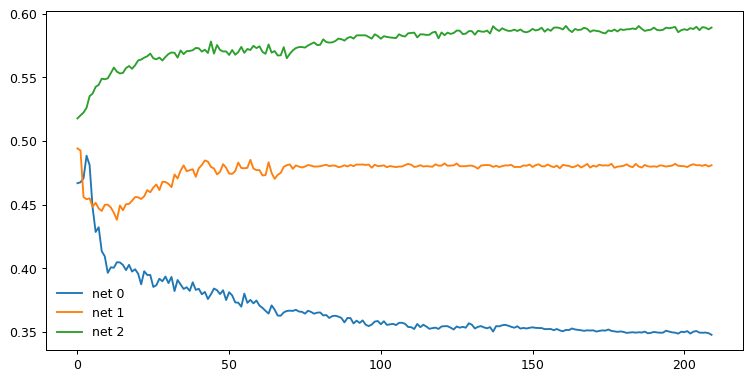

In [0]:
fig = plt.figure(1, figsize=(10, 5), dpi=90)
plt.subplot(111)
plt.plot(fractional_layer_energies[:,0], label = 'net 0')
plt.plot(fractional_layer_energies1[:,0], label = 'net 1')
plt.plot(fractional_layer_energies2[:,0], label = 'net 2')
plt.legend(frameon = False)

torch.save(net2.state_dict(),'./sample_data/vgg19_net2.pth')
torch.save(net1.state_dict(),'./sample_data/vgg19_net1.pth')
torch.save(net.state_dict(),'./sample_data/vgg19_net0.pth')

In [0]:
epoch = 49

size_1 = int(fractional_layer_energies2[epoch,1] * size_1)
size_2 = int(fractional_layer_energies2[epoch,2] * size_2)
size_4 = int(fractional_layer_energies2[epoch,4] * size_4)
size_5 = int(fractional_layer_energies2[epoch,5] * size_5)
size_7 = int(fractional_layer_energies2[epoch,7] * size_7)
size_8 = int(fractional_layer_energies2[epoch,8] * size_8)
size_9 = int(fractional_layer_energies2[epoch,9] * size_9)
size_10 = int(fractional_layer_energies2[epoch,10] * size_10)
# size_12 = int(fractional_layer_energies2[epoch,12] * size_12)
# size_13 = int(fractional_layer_energies2[epoch,13] * size_13)
# size_14 = int(fractional_layer_energies2[epoch,14] * size_14)
# size_15 = int(fractional_layer_energies2[epoch,15] * size_15)
# size_17 = int(fractional_layer_energies2[epoch,17] * size_17)
# size_18 = int(fractional_layer_energies2[epoch,18] * size_18)
# size_19 = int(fractional_layer_energies2[epoch,19] * size_19)
# size_20 = int(fractional_layer_energies2[epoch,20] * size_20)
print(size_1,size_2,size_4,size_5,size_7,size_8,size_9)

class Net3(nn.Module):

    def __init__(self):
        super(Net3, self).__init__()
        # 3 input channels for CIFAR10, VGG11 calls for 64 output channels from 
        # the first conv layer, a batchnorm, then a ReLU
        self.conv1 = nn.Conv2d(3, size_1, kernel_size = 3, padding = 1)
        self.norm1 = nn.BatchNorm2d(size_1)
        self.relu1 = nn.ReLU()
        
        #layer 2 is a conv that produces 64 channels, same format as layer 1
        self.conv2 = nn.Conv2d(size_1, size_2, kernel_size = 3, padding = 1)
        self.norm2 = nn.BatchNorm2d(size_2)
        self.relu2 = nn.ReLU()
        
        #layer 3 is a pooling layer
        self.pool3 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 4 is a conv that produces 128 channels, same format as layer 1
        self.conv4 = nn.Conv2d(size_2, size_4, kernel_size = 3, padding = 1)
        self.norm4 = nn.BatchNorm2d(size_4)
        self.relu4 = nn.ReLU()
        
        #layer 5 is a conv that produces 128 channels, same format as layer 1
        self.conv5 = nn.Conv2d(size_4, size_5, kernel_size = 3, padding = 1)
        self.norm5 = nn.BatchNorm2d(size_5)
        self.relu5 = nn.ReLU()
        
        #layer 6 is a pooling layer
        self.pool6 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 7 is a conv that produces 256 channels, same format as layer 1
        self.conv7 = nn.Conv2d(size_5, size_7, kernel_size = 3, padding = 1)
        self.norm7 = nn.BatchNorm2d(size_7)
        self.relu7 = nn.ReLU()
        
        #layer 8 is a conv that produces 256 channels, same format as layer 1
        self.conv8 = nn.Conv2d(size_7, size_8, kernel_size = 3, padding = 1)
        self.norm8 = nn.BatchNorm2d(size_8)
        self.relu8 = nn.ReLU()
        
        #layer 9 is a conv that produces 256 channels, same format as layer 1
        self.conv9 = nn.Conv2d(size_8, size_9, kernel_size = 3, padding = 1)
        self.norm9 = nn.BatchNorm2d(size_9)
        self.relu9 = nn.ReLU()
        
        #layer 10 is a conv that produces 256 channels, same format as layer 1
        self.conv10 = nn.Conv2d(size_9, size_10, kernel_size = 3, padding = 1)
        self.norm10 = nn.BatchNorm2d(size_10)
        self.relu10 = nn.ReLU()
        
        # #layer 11 is a pooling layer
        # self.pool11 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        # #layer 12 is a conv that produces 512 channels, same format as layer 1
        # self.conv12 = nn.Conv2d(size_10, size_12, kernel_size = 3, padding = 1)
        # self.norm12 = nn.BatchNorm2d(size_12)
        # self.relu12 = nn.ReLU()
        
        # #layer 13 is a conv that produces 512 channels, same format as layer 1
        # self.conv13 = nn.Conv2d(size_12, size_13, kernel_size = 3, padding = 1)
        # self.norm13 = nn.BatchNorm2d(size_13)
        # self.relu13 = nn.ReLU()
        
        # #layer 14 is a conv that produces 512 channels, same format as layer 1
        # self.conv14 = nn.Conv2d(size_13, size_14, kernel_size = 3, padding = 1)
        # self.norm14 = nn.BatchNorm2d(size_14)
        # self.relu14 = nn.ReLU()
        
        # #layer 15 is a conv that produces 512 channels, same format as layer 1
        # self.conv15 = nn.Conv2d(size_14, size_15, kernel_size = 3, padding = 1)
        # self.norm15 = nn.BatchNorm2d(size_15)
        # self.relu15 = nn.ReLU()
        
        # #layer 16 is a pooling layer
        # self.pool16 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        # #layer 17 is a conv that produces 512 channels, same format as layer 1
        # self.conv17 = nn.Conv2d(size_15, size_17, kernel_size = 3, padding = 1)
        # self.norm17 = nn.BatchNorm2d(size_17)
        # self.relu17 = nn.ReLU()
        
        # #layer 18 is a conv that produces 512 channels, same format as layer 1
        # self.conv18 = nn.Conv2d(size_17, size_18, kernel_size = 3, padding = 1)
        # self.norm18 = nn.BatchNorm2d(size_18)
        # self.relu18 = nn.ReLU()
        
        # #layer 19 is a conv that produces 512 channels, same format as layer 1
        # self.conv19 = nn.Conv2d(size_18, size_19, kernel_size = 3, padding = 1)
        # self.norm19 = nn.BatchNorm2d(size_19)
        # self.relu19 = nn.ReLU()
        
        # #layer 20 is a conv that produces 512 channels, same format as layer 1
        # self.conv20 = nn.Conv2d(size_19, size_20, kernel_size = 3, padding = 1)
        # self.norm20 = nn.BatchNorm2d(size_20)
        # self.relu20 = nn.ReLU()
        
        #layer 21 is a pooling layer
        self.pool21 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 22 is an average pooling layer
        self.pool22 = nn.AvgPool2d(kernel_size=1, stride=1)
        
        #layer 23 is a fully connected layer
        self.full23 = nn.Linear(size_9*4*4, 10)
        
        

    def forward(self, x0):
        x1 = self.conv1(x0)
        x1 = self.norm1(x1)
        x1 = self.relu1(x1)
        
        x2 = self.conv2(x1)
        x2 = self.norm2(x2)
        x2 = self.relu2(x2)
        
        x3 = self.pool3(x2)
        
        x4 = self.conv4(x3)
        x4 = self.norm4(x4)
        x4 = self.relu4(x4)
        
        x5 = self.conv5(x4)
        x5 = self.norm5(x5)
        x5 = self.relu5(x5)
        
        x6 = self.pool6(x5)
        
        x7 = self.conv7(x6)
        x7 = self.norm7(x7)
        x7 = self.relu7(x7)
        
        x8 = self.conv8(x7)
        x8 = self.norm8(x8)
        x8 = self.relu8(x8)
        
        x9 = self.conv9(x8)
        x9 = self.norm9(x9)
        x9 = self.relu9(x9)
        
        x10 = self.conv10(x9)
        x10 = self.norm10(x10)
        x10 = self.relu10(x10)
        
        # x11 = self.pool11(x10)
        
        # x12 = self.conv12(x11)
        # x12 = self.norm12(x12)
        # x12 = self.relu12(x12)
        
        # x13 = self.conv13(x12)
        # x13 = self.norm13(x13)
        # x13 = self.relu13(x13)
        
        # x14 = self.conv14(x13)
        # x14 = self.norm14(x14)
        # x14 = self.relu14(x14)
        
        # x15 = self.conv15(x14)
        # x15 = self.norm15(x15)
        # x15 = self.relu15(x15)
        
        # x16 = self.pool16(x15)
        
        # x17 = self.conv17(x16)
        # x17 = self.norm17(x17)
        # x17 = self.relu17(x17)
        
        # x18 = self.conv18(x17)
        # x18 = self.norm18(x18)
        # x18 = self.relu18(x18)
        
        # x19 = self.conv19(x18)
        # x19 = self.norm19(x19)
        # x19 = self.relu19(x19)
        
        # x20 = self.conv20(x19)
        # x20 = self.norm20(x20)
        # x20 = self.relu20(x20)
       
        x21 = self.pool21(x10)
        
        x22 = self.pool22(x21)
        
        x22 = x22.view(x10.size(0), -1)
        x23 = self.full23(x22)
        
        #return the activations from each layer as well as the output
        output = x23
        activations = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10]
        return output, activations

5 3 9 5 8 6 1


In [0]:
print('==> Building model..')

absolute_layer_energies3 = np.zeros((num_epochs, num_layers))
fractional_layer_energies3 = np.zeros((num_epochs, num_layers))

net3 = Net3()
net3 = net3.to(device)
net3 = torch.nn.DataParallel(net3)
cudnn.benchmark = True

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net3.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)

# Training
def train(epoch):
    print('\nEpoch: %d' % epoch)
    net3.train()
    train_loss = 0
    correct = 0
    total = 0
    activations = []
    
    previous_time = time.process_time()
    
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs, activations = net3(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        if batch_idx%100==0:
            current_time = time.process_time()
            print(batch_idx, len(testloader), 'Lap time (s): %.2f | Loss: %.3f | Acc: %.3f%% (%d/%d)'
                    % (current_time - previous_time, train_loss/(batch_idx+1), 100.*correct/total, correct, total))
            previous_time = current_time
            
    this_epoch_abs_energies, this_epoch_frac_energies = count_non_zeros(activations)
    fractional_layer_energies3[epoch] = this_epoch_frac_energies
    absolute_layer_energies3[epoch] = this_epoch_abs_energies
    print('Total activation density: %.3f' % (fractional_layer_energies3[epoch, 0]))


def test(epoch):
    global best_acc
    net3.eval()
    test_loss = 0
    correct = 0
    total = 0
    activations = []
    previous_time = time.process_time()
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs, activations = net3(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            if batch_idx%100 == 0:
                current_time = time.process_time()
                print(batch_idx, len(testloader), 'Lap time (s): %.2f | Loss: %.3f | Acc: %.3f%% (%d/%d)'
                    % (current_time - previous_time, test_loss/(batch_idx+1), 100.*correct/total, correct, total))
                previous_time = current_time


def count_non_zeros(activations): 
    
    #returns: numpy array containing the number of non-zero activations per layer (15x1)
    #         numpy array containing the fraction of non-zero activations per layer (15x1)
    
    n = 0
    num_zeros = np.zeros((22,), dtype = int)
    num_non_zeros = np.zeros((22,), dtype = int)
    total_activations = np.zeros((22,), dtype = int)
    fraction_non_zero = np.zeros((22,), dtype = float)
    for x in activations:
        n += 1
        #reshape activations into a flat list
        num_activations = x.size()[0] * x.size()[1] * x.size()[2] * x.size()[3]
        
        y = x.view(num_activations).tolist()
        
        #count how many entries are zero / non-zero
        num_zeros[n] = y.count(0)
        total_activations[n] = num_activations
        num_non_zeros[n] = len(y) - num_zeros[n]
        fraction_non_zero[n] = num_non_zeros[n].astype(float)/float(len(y))
        #print(n, num_non_zeros[n], len(y), '%.3f' % (fraction_non_zero[n]))
        
    #store total values in the zero slot
    num_non_zeros[0] = np.sum(num_non_zeros) 
    total_activations[0] = np.sum(total_activations)
    fraction_non_zero[0] = num_non_zeros[0].astype(float)/total_activations[0].astype(float)
    return num_non_zeros, fraction_non_zero

for epoch in range(80):
    train(epoch)
    test(epoch)
    print('Elapsed time: %.2f' % (time.process_time()))
    

==> Building model..

Epoch: 0
0 100 Lap time (s): 0.11 | Loss: 2.438 | Acc: 14.844% (19/128)
100 100 Lap time (s): 1.00 | Loss: 2.202 | Acc: 16.368% (2116/12928)
200 100 Lap time (s): 1.01 | Loss: 2.073 | Acc: 21.879% (5629/25728)
300 100 Lap time (s): 1.03 | Loss: 2.003 | Acc: 24.943% (9610/38528)
Total activation density: 0.598
0 100 Lap time (s): 0.08 | Loss: 1.585 | Acc: 37.000% (37/100)
Elapsed time: 1659.10

Epoch: 1
0 100 Lap time (s): 0.08 | Loss: 1.748 | Acc: 40.625% (52/128)
100 100 Lap time (s): 1.01 | Loss: 1.712 | Acc: 36.873% (4767/12928)
200 100 Lap time (s): 0.99 | Loss: 1.702 | Acc: 37.119% (9550/25728)
300 100 Lap time (s): 1.00 | Loss: 1.692 | Acc: 37.552% (14468/38528)
Total activation density: 0.606
0 100 Lap time (s): 0.06 | Loss: 1.679 | Acc: 42.000% (42/100)
Elapsed time: 1663.59

Epoch: 2
0 100 Lap time (s): 0.07 | Loss: 1.674 | Acc: 40.625% (52/128)
100 100 Lap time (s): 1.00 | Loss: 1.607 | Acc: 40.903% (5288/12928)
200 100 Lap time (s): 0.99 | Loss: 1.597 |

In [0]:
epoch = 27

size_1 = int(fractional_layer_energies3[epoch,1] * size_1)
size_2 = int(fractional_layer_energies3[epoch,2] * size_2)
size_4 = int(fractional_layer_energies3[epoch,4] * size_4)
size_5 = int(fractional_layer_energies3[epoch,5] * size_5)
size_7 = int(fractional_layer_energies3[epoch,7] * size_7)
size_8 = int(fractional_layer_energies3[epoch,8] * size_8)
size_9 = int(fractional_layer_energies3[epoch,9] * size_9)
# size_10 = int(fractional_layer_energies3[epoch,10] * size_10)
# size_12 = int(fractional_layer_energies3[epoch,12] * size_12)
# size_13 = int(fractional_layer_energies3[epoch,13] * size_13)
# size_14 = int(fractional_layer_energies3[epoch,14] * size_14)
# size_15 = int(fractional_layer_energies3[epoch,15] * size_15)
# size_17 = int(fractional_layer_energies3[epoch,17] * size_17)
# size_18 = int(fractional_layer_energies3[epoch,18] * size_18)
# size_19 = int(fractional_layer_energies3[epoch,19] * size_19)
# size_20 = int(fractional_layer_energies3[epoch,20] * size_20)
print(size_1,size_2,size_4,size_5,size_7,size_8,size_9)

2 2 3 3 4 2 0
